In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info() # to find out columns info about non null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe() # check descriptive statistics for numerical columns eg. What is the min, max, min value of particular column.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  EDA

<AxesSubplot:>

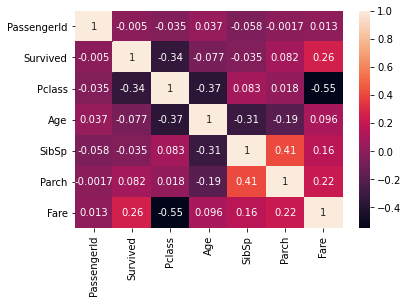

In [5]:
sns.heatmap(df.corr(), annot = True) # correlation of columns.

In [6]:
df.notna().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<AxesSubplot:>

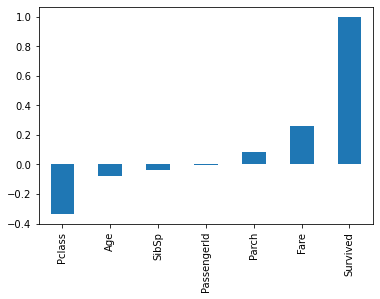

In [7]:
df.corr()['Survived'].sort_values().plot(kind='bar') # plot all columns correaltion with respect to survived column.

In [8]:
df.corr()['Survived'].sort_values() 

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [9]:
df.isna().sum()  # see nan (missing) values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

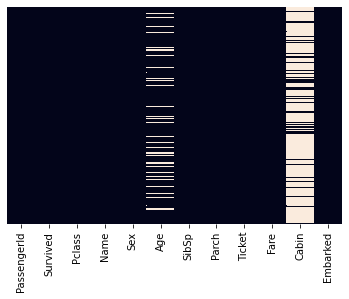

In [10]:
sns.heatmap(df.isna(),cbar=False,annot=False, yticklabels=False)  

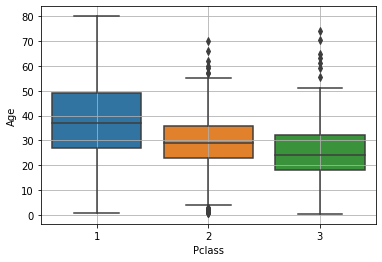

In [11]:
sns.boxplot(x="Pclass", y="Age", data=df) # Age column has missing values. to fill the missing values mean age of every passenger class is used.
plt.grid(True)

By above graph conclude that average age of Pclass1 is 37, Pclass2 is 29, Pclass 3 is 24. 

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
df['Age'] = df[["Age","Pclass"]].apply(impute_age, axis=1) # fill the  missing values of age columns as per Pclass.

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.drop('Cabin', axis=1, inplace=True) # we dont need cabin column thats why drop cabin column.

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df.dropna(inplace = True) # there are only 2 rows which contained missing values, therefore droped those rows.

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # droped unwanted columns.

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Visualization

# Survived Passengers based on Gender.

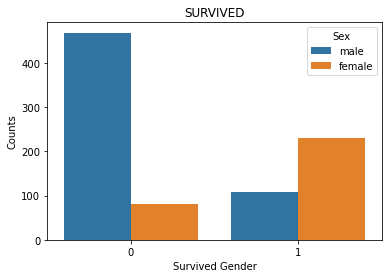

In [22]:
sns.countplot(x="Survived",hue='Sex', data=df) 
plt.title("SURVIVED")
plt.xlabel("Survived Gender")
plt.ylabel("Counts")
plt.show()

By analysing the above graph we can say that feamles and children were mostly saved; whereas male death ratio is high. Out of total passengers around 300 passengers are saved. 

# Survived Passengers based on Passenger Class.

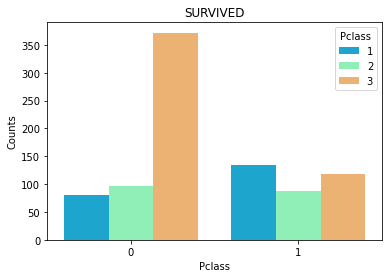

In [23]:
sns.countplot(x="Survived",hue='Pclass', data=df, palette='rainbow')
plt.title("SURVIVED")
plt.xlabel("Pclass")
plt.ylabel("Counts")
plt.show()

Passengers of 3rd class hashighest death. While Passengers of 1st class has least death ratio.

# Number of Siblings/Spouses Travelling.

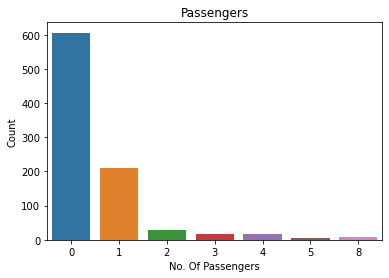

In [24]:
sns.countplot(x="SibSp", data=df)
plt.title("Passengers")
plt.xlabel("No. Of Passengers")
plt.ylabel("Count")
plt.show()

In [25]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

There were 606 passengers travelling alone, 209 passengers travelling with 1 sibling/spouses, 28 passengers travelling with 2 sibling/spouses, 18 passengers travelling with 4 sibling/spouses, 16 passengers travelling with 3 sibling/spouses, 7 passengers travelling with 8 sibling/spouses, 5 passengers travelling with 5 sibling/spouses.

# Ticket Fare.

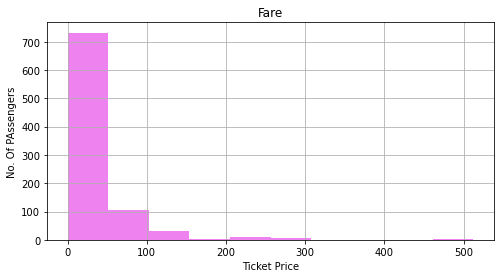

In [26]:
df['Fare'].hist(color='violet', figsize=(8,4))
plt.title("Fare")
plt.xlabel("Ticket Price")
plt.ylabel("No. Of PAssengers")
plt.show()

In [27]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

We can conclude that there was more than 700 passengers traveling free. Ticket range is 50-300 dollar and there are few passengers who paid around 500 dollars.

# Model Building.

# Separate X and Y.

In [28]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

Convert categorical columns into numerical columns using OneHotEncoder.

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), ['Sex','Embarked'])], remainder='passthrough')

x = np.array( ct.fit_transform(x))

In [30]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Split data into train,test

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

# Import Models

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Build Models

In [34]:
def my_models(model):   # creating function to get accuracy, calssification report and confusion matrix.
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(f"{accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}")

In [35]:
model=[]
model.append(("knn : ",KNeighborsClassifier()))
model.append(("logistic :",LogisticRegression()))
model.append(("support vector : ",SVC()))


for name,model in model:
    print(name)
    my_models(model)
    print()

knn : 
0.7219730941704036

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.65      0.60      0.62        85

    accuracy                           0.72       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223


[[110  28]
 [ 34  51]]

logistic :
0.8430493273542601

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223


[[120  18]
 [ 17  68]]

support vector : 
0.6502242152466368

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.56      0.38      0.45        85

    accuracy                        

# Hyper Parameter Tuning.

knn

In [36]:
accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    print(f"{i} : {accuracy_score(ytest,ypred)}")
    
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

1 : 0.7085201793721974
2 : 0.695067264573991
3 : 0.726457399103139
4 : 0.7040358744394619
5 : 0.7219730941704036
6 : 0.6995515695067265
7 : 0.7040358744394619
8 : 0.6816143497757847
9 : 0.6905829596412556
10 : 0.672645739910314
11 : 0.7085201793721974
12 : 0.6816143497757847
13 : 0.7085201793721974
14 : 0.7040358744394619
15 : 0.7130044843049327
16 : 0.7085201793721974
17 : 0.6905829596412556
18 : 0.7085201793721974
19 : 0.6860986547085202
20 : 0.6860986547085202
21 : 0.6860986547085202
22 : 0.6681614349775785
23 : 0.6681614349775785
24 : 0.6771300448430493
25 : 0.6547085201793722
26 : 0.6547085201793722
27 : 0.6547085201793722
28 : 0.6502242152466368
29 : 0.6681614349775785


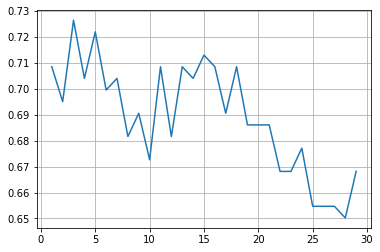

In [37]:
plt.plot(range(1,30),accuracy)
plt.grid(True)

The above  graph shows  that, at 3 neighbors point we get maximum accuracy so selecting n_neighbors = 3.

Logistic Regression

In [38]:
logreg=[]
logreg.append(("logistic 1 :",LogisticRegression(solver='newton-cg')))
logreg.append(("logistic 2 :",LogisticRegression(solver='liblinear')))
logreg.append(("logistic 3 :",LogisticRegression(solver='lbfgs')))
logreg.append(("logistic 4 :",LogisticRegression(solver='sag')))
logreg.append(("logistic 5 :",LogisticRegression(solver='saga')))



for name,model in logreg:
    print(name)
    my_models(model)
    print()

logistic 1 :
0.852017937219731

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.80      0.81      0.81        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


[[121  17]
 [ 16  69]]

logistic 2 :
0.8430493273542601

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       138
           1       0.80      0.79      0.79        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223


[[121  17]
 [ 18  67]]

logistic 3 :
0.8430493273542601

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                      

By using solver as newton-cg we get maximum accuraccy(0.85).

SVM

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
para={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001],"kernel":['rbf']}

grid=GridSearchCV(SVC(),para,refit=True,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
grid.best_params_   # Check best parameters for tuning.

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

To get maximum accuracy in SVM we used above best parameters.

In [42]:
model=[]
model.append(("knn : ",KNeighborsClassifier(n_neighbors=3)))
model.append(("logistic :",LogisticRegression(solver='newton-cg')))
model.append(("support vector : ",SVC(C=100, gamma=0.001,kernel='rbf')))


for name,model in model:
    print(name)
    my_models(model)
    print()

knn : 
0.726457399103139

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.64      0.65      0.64        85

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223


[[107  31]
 [ 30  55]]

logistic :
0.852017937219731

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.80      0.81      0.81        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


[[121  17]
 [ 16  69]]

support vector : 
0.8295964125560538

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       138
           1       0.76      0.80      0.78        85

    accuracy                          

# RESULT

A) Before Hyperparameter Tuning Accuracy was :

ACCURACY[KNN] = 0.7219730941704036

ACCURACY[LOGISTIC] = 0.8430493273542601

ACCURACY[SVM] = 0.6502242152466368



B) After Hyperparameter Tuning for Accuracy is :

ACCURACY[KNN] = 0.726457399103139

ACCURACY[LOGISTIC] = 0.852017937219731

ACCURACY[SVM] = 0.8295964125560538

By above result we conclude that we get maximum acuuracy(85%) by using Logistic(solver='newton-cg') Regression model. 